# Calculate deformable mirror stroke length needed for 1um of defocus.

### Based directly on a Mathematica notebook by Martin Booth (2017-7-18).

### Copyright Mick Phillips, Martin Booth, 2017.

Defocus phase on a reference sphere at angle $\theta$ required for a focal shift of $z$ in medium of refractive index $n$ and wavenumber $k = 2 \pi n / \lambda$ is given by

$$\Phi(\theta) = k z \cos(\theta)$$

Phase length modulation is equivalently:

$$L(\theta) = z \cos(\theta)$$

Transforming into the unit pupil for an objective lens obeying the sine condition requires using $r = \sin(\theta) / \sin(\alpha)$ where $r$ is the normalised radius in pupil space and $\alpha$ is the semi-aperture angle from $\textrm{NA} = n \sin(\alpha)$:

$$L(r) = z \sqrt{1 - r^2 \sin(\alpha)^2}$$

This is a monotonically decreasing function from r=0 to r=1. The required path length difference between the centre and edge of the pupil is therefore:

$$L(0) - L(1) = z - z \sqrt{1 - \sin(\alpha)^2}$$

or equivalently:

$$ DL(z) = z(1 - \cos(\alpha))$$

Note that a deformable mirror will provide twice the path length modulation than the applied deformation, thus the required stroke for defocus $z$ is given by

$$DL(z) / 2$$


In [1]:
NA = 1.2
n = 1.33

import numpy as np
from numpy import cos, arcsin

def alpha(NA, n):
    """Half angle for objective in medium.
    
    :param n:  refractive index of medium
    :param NA: numerical aperture of objective
    """
    return arcsin(NA/n)

def path_modulation(z, a):
    """Path modulation required for given defocus and half angle.
    
    :param z:  defocus
    :param a:  half-aperture angle (alpha)
    """
    return z * (1 - cos(a))


print ("Half angle is %f \n\
       \n1 unit length of defocus requires \
       \n\t%.2f  unit length of path modulation \
       \n\t%.2f  unit length of stroke length" % 
       (alpha(NA, n), 
        path_modulation(1, alpha(NA, n)),
        0.5 * path_modulation(1, alpha(NA, n))))

Half angle is 1.124972 
       
1 unit length of defocus requires        
	0.57  unit length of path modulation        
	0.28  unit length of stroke length


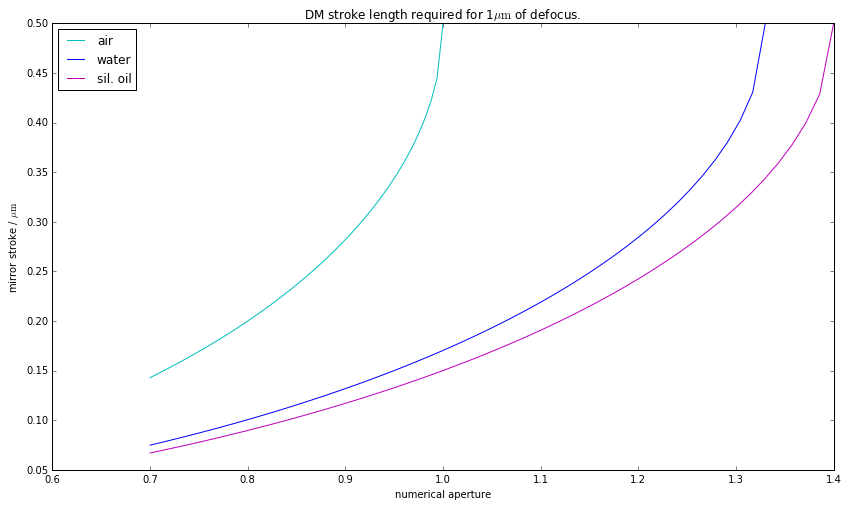

In [16]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,8)

air_n = 1.0
air_apertures = np.linspace(0.7, air_n)
air_strokes = 0.5 * path_modulation(1, alpha(air_apertures, air_n))

water_n = 1.33
water_apertures = np.linspace(0.7, water_n)
water_strokes = 0.5 * path_modulation(1, alpha(water_apertures, water_n))

silicone_n = 1.4
silicone_apertures = np.linspace(0.7, silicone_n)
silicone_strokes = 0.5 * path_modulation(1, alpha(silicone_apertures, silicone_n))

plt.plot(air_apertures, air_strokes, 'c', label='air')
plt.plot(water_apertures, water_strokes, 'b', label='water')
plt.plot(silicone_apertures, silicone_strokes, 'm', label='sil. oil')
plt.legend(loc=0)
plt.title('DM stroke length required for 1$\mathrm{\mu m}$ of defocus.')
plt.xlabel('numerical aperture')
plt.ylabel("mirror stroke / $\mathrm{\mu m}$")
plt.show()